In [45]:
import pandas as pd


Text(0.5, 1.0, 'Histogram of Carat in Diamonds')

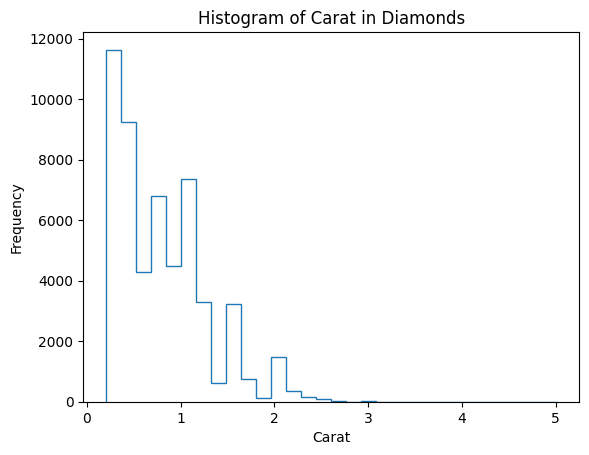

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.get_dataset_names()
data = sns.load_dataset('diamonds')
x = data['carat']
plt.hist(x, bins=30, histtype='step');
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.title('Histogram of Carat in Diamonds')

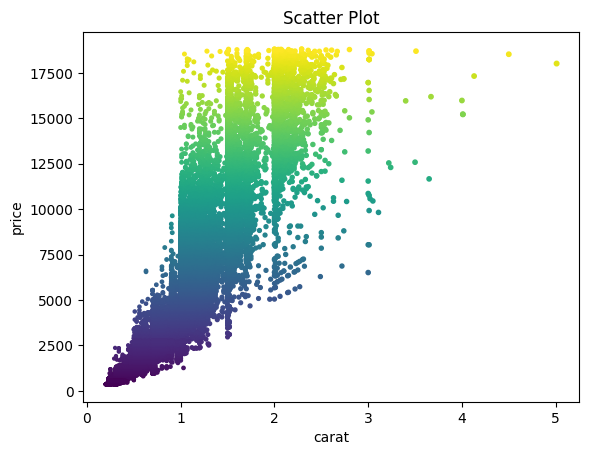

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [28]:
plt.scatter(data['carat'], data['price'], c=data['price'], s=data['x'])
plt.title('Scatter Plot')
plt.xlabel('carat')
plt.ylabel('price')
plt.show()
data

In [40]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Text(0, 0.5, 'Carats')

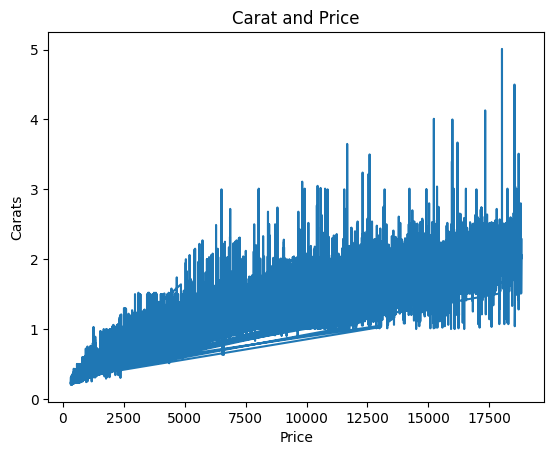

In [56]:
plt.plot(data['price'],data['carat'])
#plt.plot(data['price'])
plt.title('Carat and Price')
plt.xlabel('Price')
plt.ylabel('Carats')

In [57]:
import seaborn as sns

Text(0.5, 1.0, 'Line Plot - Title From Matplotlib')

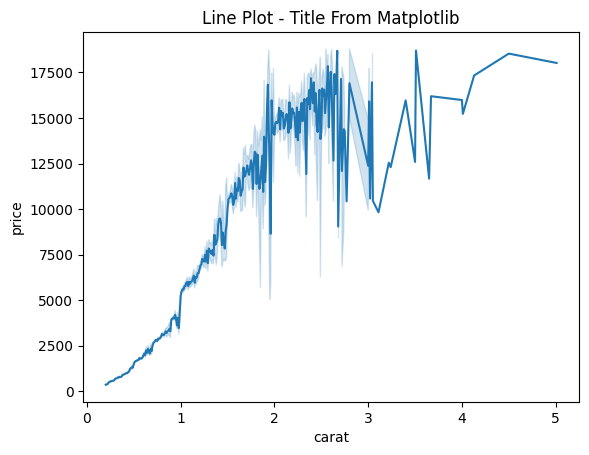

In [59]:
sns.lineplot(x='carat', y='price', data=data)
plt.title('Line Plot - Title From Matplotlib')

<Axes: xlabel='clarity', ylabel='price'>

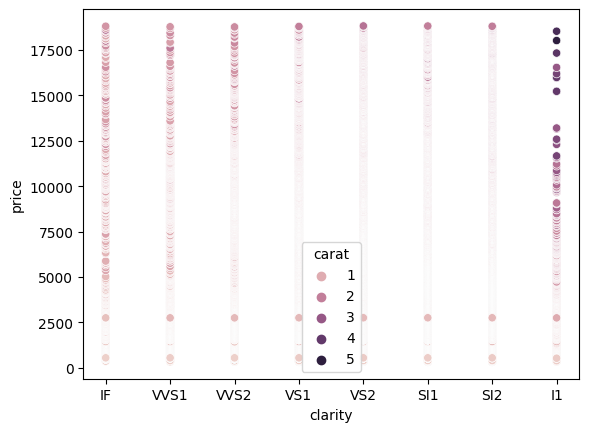

In [62]:
sns.scatterplot(x='clarity', y='price', data=data,hue='carat')

<Axes: xlabel='price', ylabel='Count'>

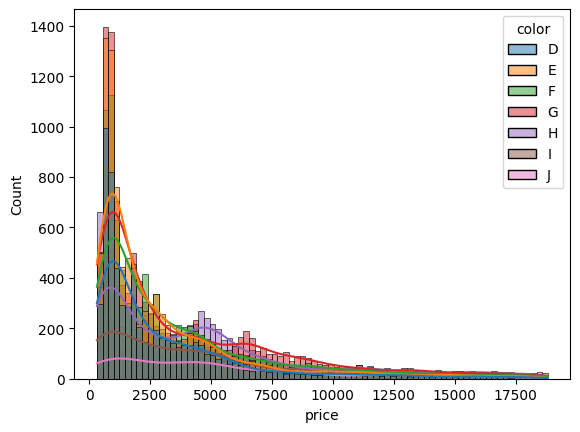

In [64]:
sns.histplot(x='price', data=data,  hue='color', kde=True)

Mean Squared Error: 2401388.654479092
R-squared (R2) Score: 0.8489390686155808


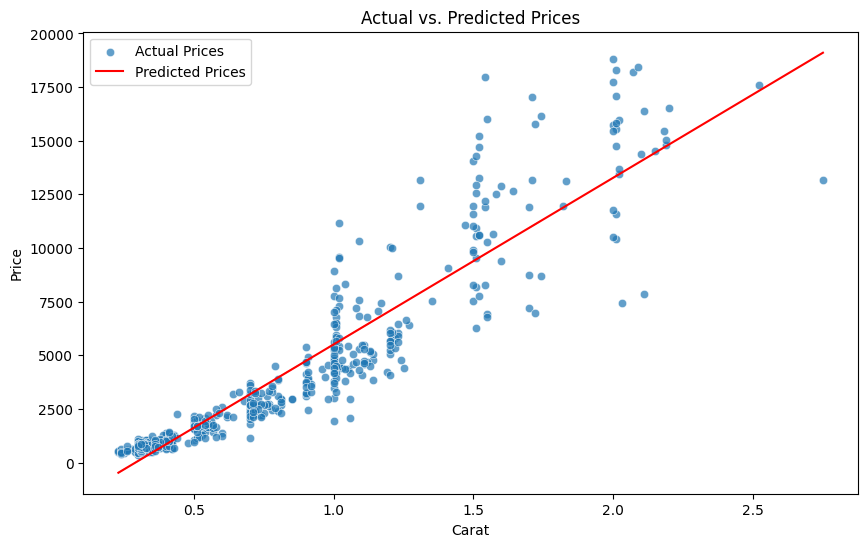

In [100]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Select relevant columns
X = data[['carat']]
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

# Plot the actual vs. predicted prices for a subset of the data
subset_data = data.sample(500, random_state=42)
subset_data['predicted_price'] = linear_regression_model.predict(subset_data[['carat']])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=subset_data, label='Actual Prices', alpha=0.7)
sns.lineplot(x='carat', y='predicted_price', data=subset_data, color='red', label='Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend()
plt.show()
